In [1]:
import cymetric as cym
import pandas as pd
import matplotlib.pyplot as plt
import sys
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
def frac_atom_to_mass(mass):
    uma_235 = 235043928.190e-6
    uma_238 = 238050786.996e-6
    return mass / uma_238 * uma_235
def frac_mass_to_atom(mass):
    uma_235 = 235043928.190e-6
    uma_238 = 238050786.996e-6
    return mass * uma_238 / uma_235


def get_frac(file, facility):
    uma_235 = 235043928.190e-6
    uma_238 = 238050786.996e-6
    db = cym.dbopen(file)
    ev = cym.Evaluator(db=db, write=False)
    df1_u8 = tm.inventories(ev, facilities=facility, nucs=['238U'])
    df1_u5 = tm.inventories(ev, facilities=facility, nucs=['235U'])
    df_r = df1_u5
    df_r[df_r.columns[1]] = (df1_u5[df1_u5.columns[1]]/uma_235)/(df1_u8[df1_u8.columns[1]]/uma_238 + df1_u5[df1_u5.columns[1]]/uma_235)
    return df_r

def get_frac_transaction(file, rec=[''], send=['']):
    uma_235 = 235043928.190e-6
    uma_238 = 238050786.996e-6
    db = cym.dbopen(file)
    ev = cym.Evaluator(db=db, write=False)
    df1_u8 = tm.transactions(ev, receivers=rec, senders=send, nucs=['238U'])
    df1_u5 = tm.transactions(ev, receivers=rec, senders=send, nucs=['235U'])
    df_r = df1_u5
    df_r[df_r.columns[1]] = (df1_u5[df1_u5.columns[1]]/uma_235)/(df1_u8[df1_u8.columns[1]]/uma_238 + df1_u5[df1_u5.columns[1]]/uma_235)
    return df_r

def format_df(df, x_label, y_label):
    df.fillna(0, inplace=True)
    return pd.DataFrame({x_label: df[df.columns[0]], y_label: df[df.columns[1]]})

def make_plot(dfs, x_name, y_name, figsize = (20,12), mk = 'x', mk_z=14, linestyle='-', mfc='none'):
    e1x = dfs[0][0].plot(x=x_name, y=dfs[0][1], 
                      marker=mk, markersize=mk_z, linestyle=linestyle, 
                      mfc=mfc, figsize=figsize)
    for df in dfs[1:]:
        df[0].plot(x=x_name, y=df[1], 
                      marker=mk, markersize=mk_z, linestyle=linestyle, 
                      mfc=mfc, figsize=figsize, ax=e1x)

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.savefig('trans.png', dpi=326)
    plt.legend()


In [3]:
db_ = cym.dbopen("cyclus_multi.sqlite")
ev_ = cym.Evaluator(db=db_, write=False)
file = "cyclus_multi.sqlite"

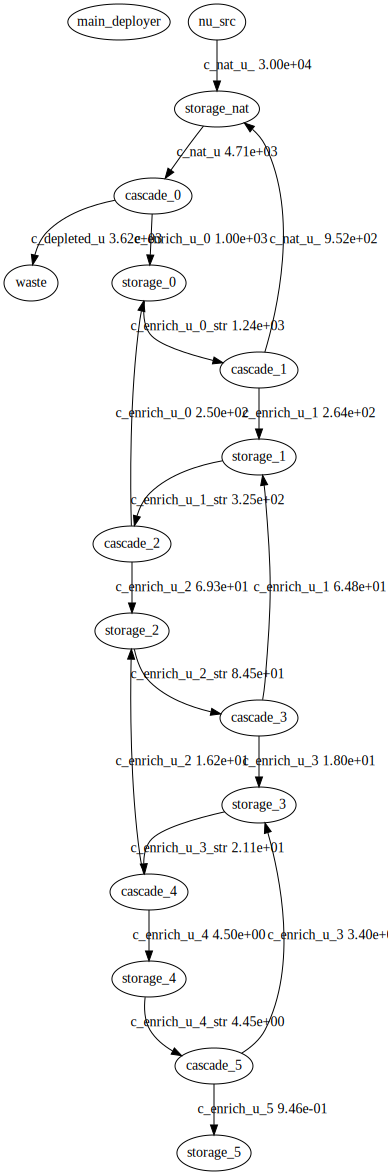

In [4]:
flow_graph = cgr.flow_graph(ev_)
flow_graph

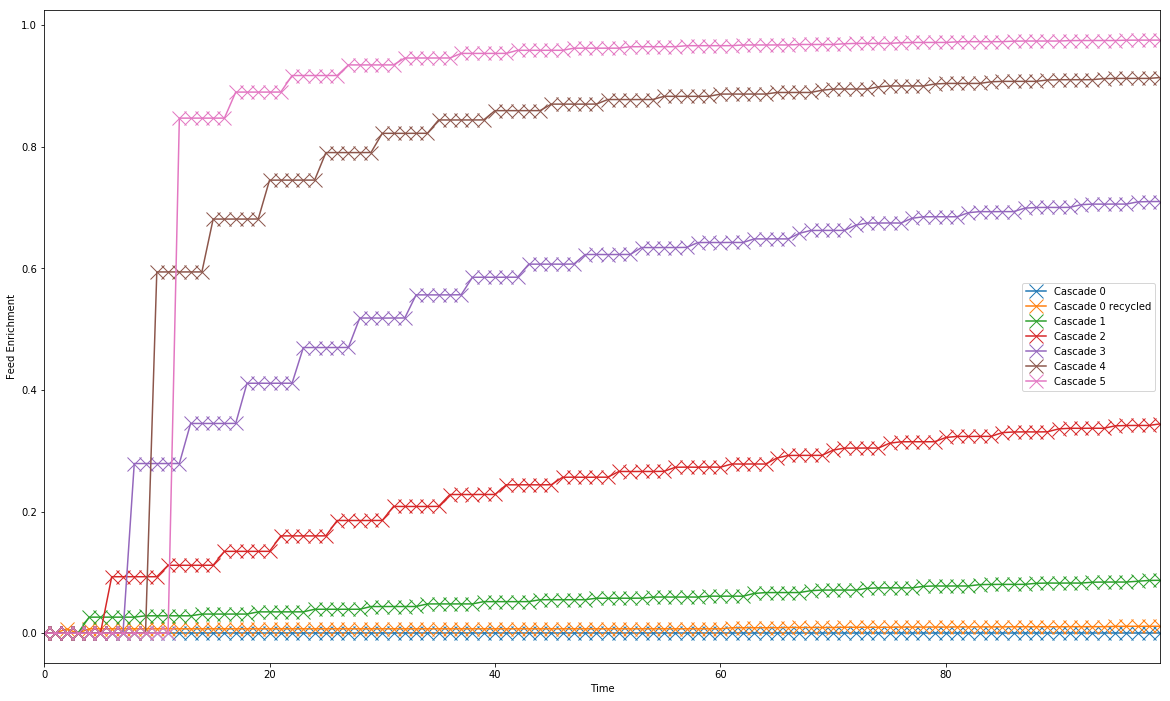

In [5]:
feed_0 = get_frac_transaction(file, rec=['cascade_0'], send=['nu_src'])
feed_0b = get_frac_transaction(file, rec=['cascade_0'], send=['storage_nat'])
feed_1 = get_frac_transaction(file, rec=['cascade_1'], send=['storage_0'])
feed_2 = get_frac_transaction(file, rec=['cascade_2'], send=['storage_1'])
feed_3 = get_frac_transaction(file, rec=['cascade_3'], send=['storage_2'])
feed_4 = get_frac_transaction(file, rec=['cascade_4'], send=['storage_3'])
feed_5 = get_frac_transaction(file, rec=['cascade_5'], send=['storage_4'])
plt_str = []
plt_str.append( (format_df(feed_0, "Time", "Cascade 0"), 'Cascade 0' ))
plt_str.append( (format_df(feed_0b, "Time", "Cascade 0 recycled"), 'Cascade 0 recycled' ))
plt_str.append( (format_df(feed_1, "Time", "Cascade 1"), 'Cascade 1' ))
plt_str.append( (format_df(feed_2, "Time", "Cascade 2"), 'Cascade 2' ))
plt_str.append( (format_df(feed_3, "Time", "Cascade 3"), 'Cascade 3' ))
plt_str.append( (format_df(feed_4, "Time", "Cascade 4"), 'Cascade 4' ))
plt_str.append( (format_df(feed_5, "Time", "Cascade 5"), 'Cascade 5' ))
make_plot(plt_str, "Time", "Feed Enrichment" )

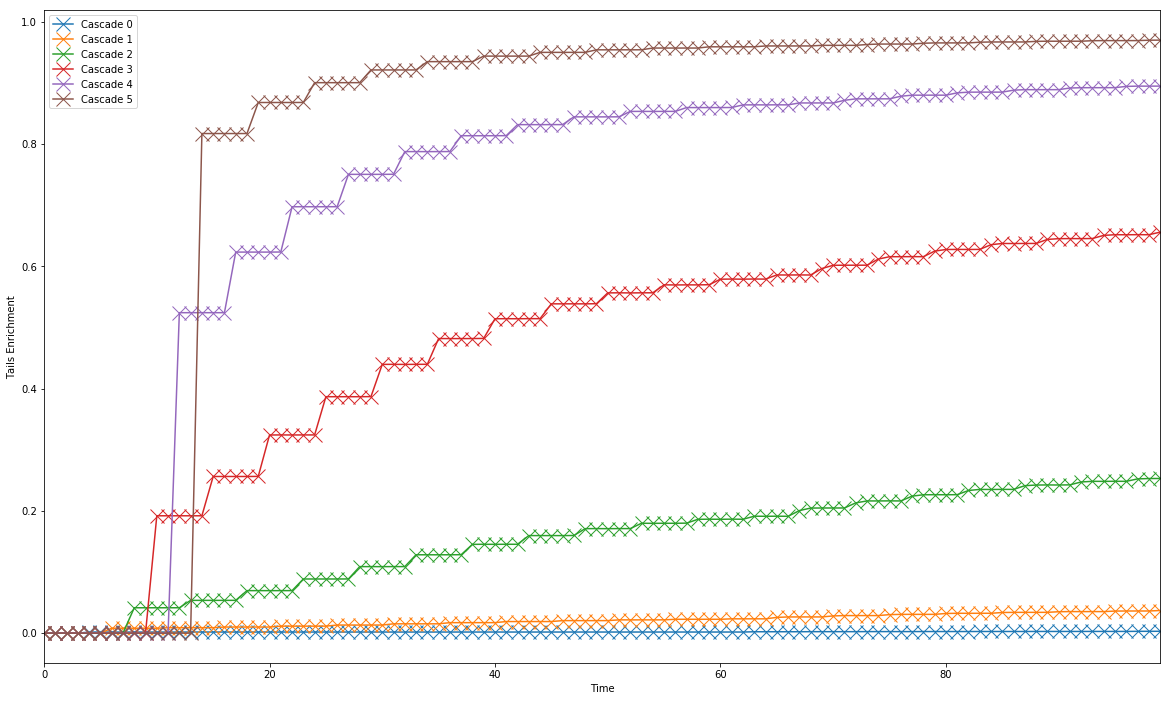

In [6]:
in_tr_0 = get_frac_transaction(file, send=['cascade_0'], rec=['waste'])
in_tr_1 = get_frac_transaction(file, send=['cascade_1'], rec=['storage_nat'])
in_tr_2 = get_frac_transaction(file, send=['cascade_2'], rec=['storage_0'])
in_tr_3 = get_frac_transaction(file, send=['cascade_3'], rec=['storage_1'])
in_tr_4 = get_frac_transaction(file, send=['cascade_4'], rec=['storage_2'])
in_tr_5 = get_frac_transaction(file, send=['cascade_5'], rec=['storage_3'])
plt_str = []
plt_str.append( (format_df(in_tr_0, "Time", "Cascade 0"), 'Cascade 0' ))
plt_str.append( (format_df(in_tr_1, "Time", "Cascade 1"), 'Cascade 1' ))
plt_str.append( (format_df(in_tr_2, "Time", "Cascade 2"), 'Cascade 2' ))
plt_str.append( (format_df(in_tr_3, "Time", "Cascade 3"), 'Cascade 3' ))
plt_str.append( (format_df(in_tr_4, "Time", "Cascade 4"), 'Cascade 4' ))
plt_str.append( (format_df(in_tr_5, "Time", "Cascade 5"), 'Cascade 5' ))
make_plot(plt_str, "Time", "Tails Enrichment" )

In [7]:
#STG-0
get_frac_transaction("cyclus_stg_0.sqlite", send=['cascade_0'], rec=['storage_0']).at[20,'Mass']

0.026334357221601559

In [8]:
#STG-1
get_frac_transaction("cyclus_stg_1.sqlite", send=['cascade_0'], rec=['storage_0']).at[20,'Mass']

0.092706200058026017

In [9]:
#STG-2
get_frac_transaction("cyclus_stg_2.sqlite", send=['cascade_0'], rec=['storage_0']).at[20,'Mass']

0.27874100100893495

In [10]:
#STG-3
get_frac_transaction("cyclus_stg_3.sqlite", send=['cascade_0'], rec=['storage_0']).at[20,'Mass']

0.59377673456187052

In [11]:
#STG-4
get_frac_transaction("cyclus_stg_4.sqlite", send=['cascade_0'], rec=['storage_0']).at[20,'Mass']

0.84682541092339025

In [12]:
#STG-5
get_frac_transaction("cyclus_stg_5.sqlite", send=['cascade_0'], rec=['storage_0']).at[20,'Mass']

0.95435893069726241

In [13]:
frac_atom_to_mass(0.026697979287772927)

0.026360752702064585

In [14]:
0.026369

0.026369